In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('hiring.csv')

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df.experience[0]=df.experience[1]=0

C:\Users\04khu\AppData\Local\Temp\ipykernel_16688\3057728231.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.experience[0]=df.experience[1]=0
C:\Users\04khu\AppData\Local\Temp\ipykernel_16688\3057728231.py:1: SettingWithCopyWarning: 


In [5]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [6]:
df['test_score(out of 10)'][6]=df['test_score(out of 10)'].median()

C:\Users\04khu\AppData\Local\Temp\ipykernel_16688\1396433495.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['test_score(out of 10)'][6]=df['test_score(out of 10)'].median()
C:\Users\04khu\AppData\Local\Temp\ipykernel_16688\1396433495

In [7]:
from word2number import w2n
for i in range(2,df['experience'].size):
    df['experience'][i]=w2n.word_to_num(df['experience'][i])

C:\Users\04khu\AppData\Local\Temp\ipykernel_16688\3069854865.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['experience'][i]=w2n.word_to_num(df['experience'][i])
C:\Users\04khu\AppData\Local\Temp\ipykernel_16688\3069854865.py:3: Sett

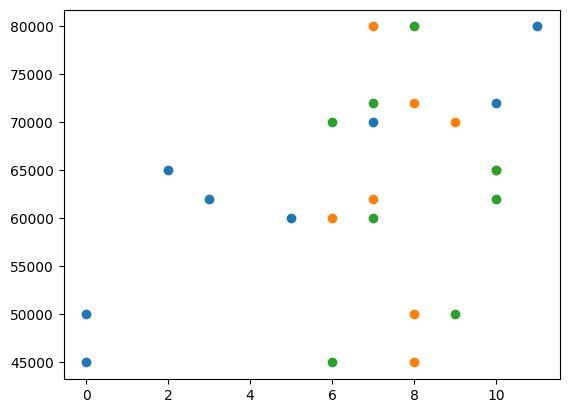

In [8]:
plt.scatter(df.experience,df['salary($)'])
plt.scatter(df['test_score(out of 10)'],df['salary($)'])
plt.scatter(df['interview_score(out of 10)'],df['salary($)'])

In [9]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [10]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [11]:
reg.intercept_

np.float64(17737.263464337688)

In [12]:
reg.predict([[2,9,5]])
reg.predict([[12,10,10]])

C:\Users\04khu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\04khu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

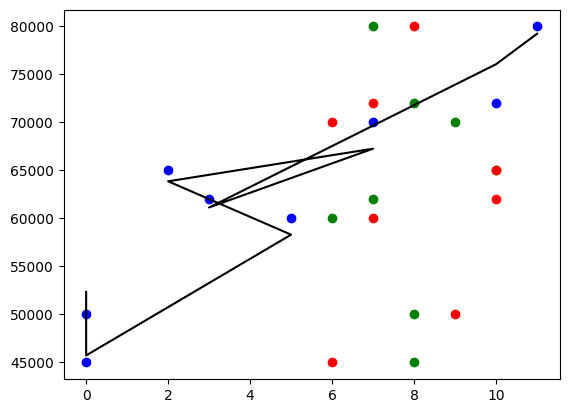

In [15]:
plt.scatter(df['experience'], df['salary($)'],color='blue')
plt.scatter(df['test_score(out of 10)'], df['salary($)'], color='green')
plt.scatter(df['interview_score(out of 10)'], df['salary($)'],color='red')
predicted_salaries = reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']])
plt.plot(df['experience'], predicted_salaries, label='Regression Line', color='black')